# Proyecto Final

## Tabla de Contenidos:
* [Primera Entrega](#primera-entrega)
    * [Empresa y Problema específico](#section_1_empresa)
    * [Preguntas y objetivos de la investigación](#section_1_preguntas)
    * [Conformación del equipo de trabajo](#section_1_equipo)
    * [Data Acquisition](#section_1_data_acquisition)
       * [Variable Description](#section_1_data_acquisition_variables)
    * [Data wrangling y EDA](#section_1_eda)  
       * [Análisis Variables Númericas](#section_1_eda_var_num)
       * [Análisis Variables Categóricas](#section_1_eda_var_cat)
       * [Correción de Datos y Outliers](#section_1_eda_outliers)
       * [Matriz de Correlación](#section_1_eda_matriz)
       * [Pair Plots](#section_1_eda_pair_plots)
* [Segunda Entrega](#segunda-entrega)
    * [Preparación de datos](#section_2_preparacion_datos)
    * [Algoritmo de Clasificación](#section_2_algoritmos)
       * [Árboles de Decisión](#section_2_algoritmos_arboles)
       * [Random Forest](#section_2_algoritmos_random) 
       * [Regresión Logística](#section_2_algoritmos_reg_log) 
* [Tercera Entrega](#tercera-entrega)
    * [Validación de datos](#section_3_valid_datos)
        * [Validación Simple](#section_3_valid_datos_simple)
        * [Cross validation: KFold](#section_3_valid_datos_Kfold)
        * [Cross Validation: Leave One Out](#section_3_valid_datos_leaveoneout)
        * [Comparación validaciones](#section_3_valid_datos_comparacion)
    * [Grid Search](#section_3_grid_search)
    * [Random Search](#section_3_random_search)


## Primera Entrega <a class="anchor" id="primera-entrega"></a>

Se debe entregar:
1) Presentación de la empresa, organización o problema específico.

2) Preguntas y objetivos de la investigación.

3) Conformación del equipo de trabajo.

4) Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

5) Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

6) Análisis de componentes principales.

7) Contar la historia de sus datos

8) Filtros aplicados a los datos. Distribución. Dataset final para analizar.

9) Palttear objetivos u objetivo para esos datos.


### Empresa y Problema específico <a class="anchor" id="section_1_empresa"></a>

Somos una empresa encargada de ofrecer soluciones estratégicas operando en sectores como la salud, compañías farmaceúticas y el desarrollo biotecnologíco.

Nos encontramos implementando un nuevo sistema capaz de detectar y predecir la falla de riesgo cardíaco en pacientes.

En 2019, las enfermedades cardiovasculares acabaron con la vida de casi 18 millones de personas, lo que representa el 32 % de las muertes en todo el mundo (Fuente: Organización Mundial de la Salud, 2021). El 85% de estas muertes se debieron a ataques cardíacos y accidentes cerebrovasculares, con un 38% entre personas menores de 70 años.

La detección temprana es fundamental en el tratamiento y manejo de enfermedades cardiovasculares, donde el aprendizaje automático puede ser una herramienta poderosa para detectar un posible diagnóstico de enfermedad cardíaca.

### Preguntas y objetivos de la investigación<a class="anchor" id="section_1_preguntas"></a>


El objetivo de la organización es desarrollar un programa de aprendizaje automático capaz de detectar enfermedades cardíacas en temprana edad para pacientes de alto riesgo, tales como diabetes, hiperlipidemia o alguna enfermedad ya establecida.

Nuestra pregunta y desafío principal es si con una poca cantidad de datos relativamente fácil de medir, se puede obtener un modelo de predicción adecuado para prevenir enfermedades cardíacas.


### Conformación del equipo de trabajo<a class="anchor" id="section_1_equipo"></a>

Targize Juan Ignacio

Salvatori Guadalupe Micaela

### Data Acquisition<a class="anchor" id="section_1_data_acquisition"></a>

El dataset fue seleccionado de la página kaggle. El mismo cuenta con variables facilmente medibles en analísis de rutina que se pueden obetener en cualquier estudio cardíaco que se realice una persona en cualquier hospital de recursos moderados.

Fuente https://www.kaggle.com/fedesoriano/heart-failure-prediction


### Variable Description<a class="anchor" id="section_1_data_acquisition_variables"></a>

Age: The age of the patient, in years.

Sex: The patient's gender, male or female.

ChestPainType: The type of chest pain experienced by the patient:
    i. TA: Typical Angina
    ii. ATA: Atypical Angina
    iii. NAP: Non-Anginal Pain
    iv. ASY: Asymptomatic
        
RestingBP: The patient's resting blood pressure (mmHg).

Cholesterol: The patient's serum cholesterol (mg/dl).

FastingBS: The patient's fasting blood sugar.
    i. 1 if glucose > 120 mg/dl
    ii. 0 otherwise

RestingECG: Resting electrocardiogram results:
    i. Normal
    ii. ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    iii. LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

MaxHR: Maximum heart rate achieved, beats per minute.

ExerciseAngina: Exercise-induced angina, yes or no.

Oldpeak: Numeric measure of ST depression induced by exercise relative to rest.

ST_Slope: The slope of the peak exercise ST segment.
    i. Up: upsloping
    ii. Flat
    iii. Down: downsloping


### Data wrangling y EDA<a class="anchor" id="section_1_eda"></a>

In [2]:
# importamos librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [3]:
df = pd.read_csv('heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [4]:
# Analizamos el dataset seleccionado
df.shape

(918, 12)

In [5]:
#Verificamos que no haya datos nulos y el que sea congruente el tipo de dato por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Analizamos las variables numericas
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [7]:
# Analizamos las variables categóricas
df.select_dtypes(include=['object']).describe()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

In [8]:
# Separamos las variables numericas y las categoricas
num = df.select_dtypes(include=np.number)
num

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130          283          0     98      0.0             0
3     48        138          214          0    108      1.5             1
4     54        150          195          0    122      0.0             0
..   ...        ...          ...        ...    ...      ...           ...
913   45        110          264          0    132      1.2             1
914   68        144          193          1    141      3.4             1
915   57        130          131          0    115      1.2             1
916   57        130          236          0    174      0.0             1
917   38        138          175          0    173      0.0             0

[918 rows x 7 columns]

In [9]:
cat = df.select_dtypes(exclude=np.number)
cat

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]

### Análisis Variables Númericas  <a class="anchor" id="section_1_eda_var_num"></a>

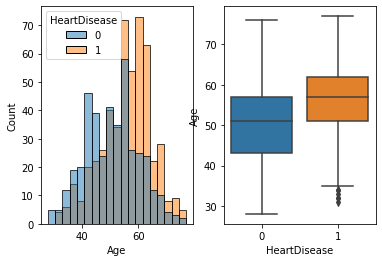

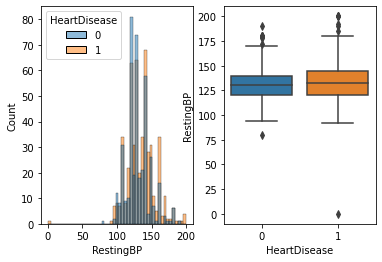

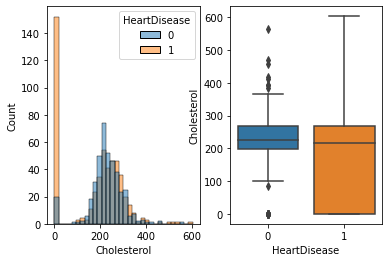

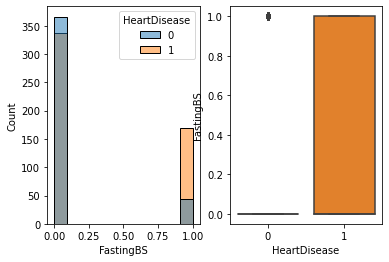

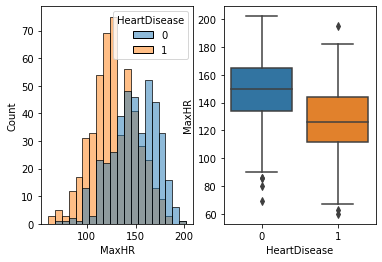

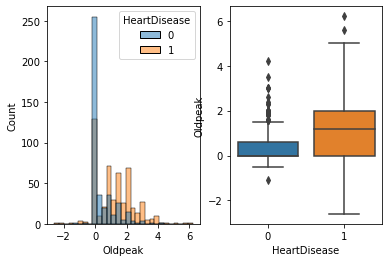

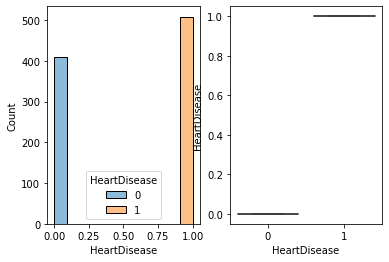

In [10]:
# Realizamos un analisis exploratorio de las variables númericas
for i in num:
  fig, axs = plt.subplots(ncols=2)
  sns.histplot(x=num[i], hue=df.HeartDisease, data=df,ax=axs[0])
  sns.boxplot(y= num[i], x= df.HeartDisease, data=df,ax=axs[1]) 


Las primeras observaciones que podemos realizar es que todas las variables poseen distribuciones choerentes, salvo el colesterol el cual presenta una cantidad anormal de casos en cero. Esto se corregira remplazandolo por la media a fín de tener menos error. En el cálculo de la frecuencia, el cual se muestra a continuación, también se puede notar esta observación

Como primera observación podemos observar un marcado aumento del fallo de riesgo cardíaco con la edad donde la mayoría de estos pacientes se encuentran entre los 52 y 62 años aproximadamente. Así también podemos decir que los pacientes entre los 40 y 52 años presentaron menos fallos cardíacos.

Analizando la presión arterial, podemos ver que los diagramas de caja son proporcionales entre los grupos. La presión arterial mediana es de aproximadamente 130 mmHg en ambos grupos.

En pacientes con diabetes, casi el 80% tienen enfermedades del corazón.

Podemos observar que los pacientes sin enfermedad cardíaca pueden alcanzar frecuencias cardíacas máximas más altas que los pacientes con enfermedad cardíaca, con una frecuencia cardíaca mediana de 150 latidos por minuto frente a una mediana de 125 latidos por minuto en pacientes cardiovasculares

Como último, existe una diferencia notable en los gráficos de caja de la depresión del segmento ST entre los grupos. Donde hay mas variabilidad con valores atípicos mas grandes cuando hay enfermedad (aproximadamente entre 0 y 2 mm) que cuando no hay (de 0 a 0,5 mm)

### Análisis Variables Categóricas  <a class="anchor" id="section_1_eda_var_cat"></a>

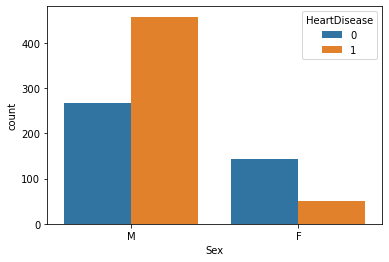

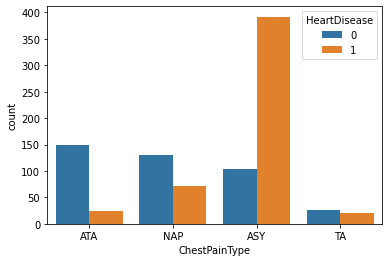

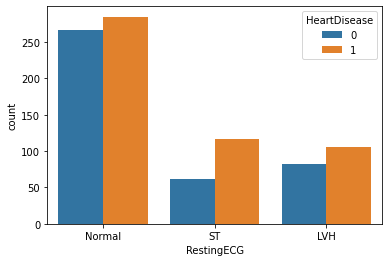

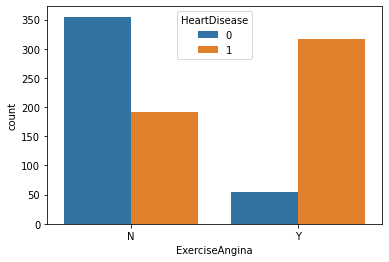

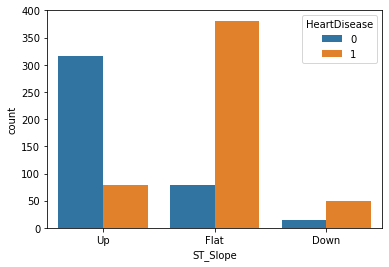

In [11]:
# Realizamos un análisis de las variables categoricas 
for i in cat:
  fig, axs = plt.subplots(ncols=1)
  sns.countplot(data= df, x=cat[i],hue=df.HeartDisease)


Podemos observar que los hombres presentan un mayor riesgo de tener enfermedades cardíacas

La prevalencia de enfermedades cardíacas es aún mayor en pacientes con angina de esfuerzo, con más del 85 %.

Según los resultados de la prueba de ECG en reposo, más del 65 % de los pacientes a los que se les diagnosticó una enfermedad cardíaca tenían anomalías en la onda ST-T en su ECG, la proporción más alta entre los grupos.

Los pacientes con una pendiente ST plana o descendente durante el ejercicio tienen la mayor prevalencia de enfermedad cardiovascular con un 82,8 % y un 77,8 %, respectivamente.

### Correción de Datos y Outliers <a class="anchor" id="section_1_eda_outliers"></a>

La existencia de ceros en las variables cholesterol y presión sanguínea en reposo (Resting BP) indícan que es un error al tomar la información. Estos datos seran remplazados por su media a fin de obtener un resultado mas representativo.

In [12]:
#Remplazo los valores por la media
df['Cholesterol'] = df['Cholesterol'].replace(0,df['Cholesterol'].mean())
display(pd.DataFrame(df.groupby('HeartDisease')['Cholesterol'].describe()))


count        mean        std    min         25%    50%     75%  \
HeartDisease                                                                   
0             410.0  236.819491  54.706689   85.0  198.799564  227.0  266.75   
1             508.0  235.424279  57.495497  100.0  198.799564  217.0  267.00   

                max  
HeartDisease         
0             564.0  
1             603.0

In [13]:
df['RestingBP'] = df['RestingBP'].replace(0,df['RestingBP'].mean())
display(pd.DataFrame(df.groupby('HeartDisease')['RestingBP'].describe()))


count        mean        std   min    25%    50%    75%    max
HeartDisease                                                                
0             410.0  130.180488  16.499585  80.0  120.0  130.0  140.0  190.0
1             508.0  134.445662  18.910339  92.0  120.0  132.0  145.0  200.0

### Matriz de Correlación <a class="anchor" id="section_1_eda_matriz"></a>

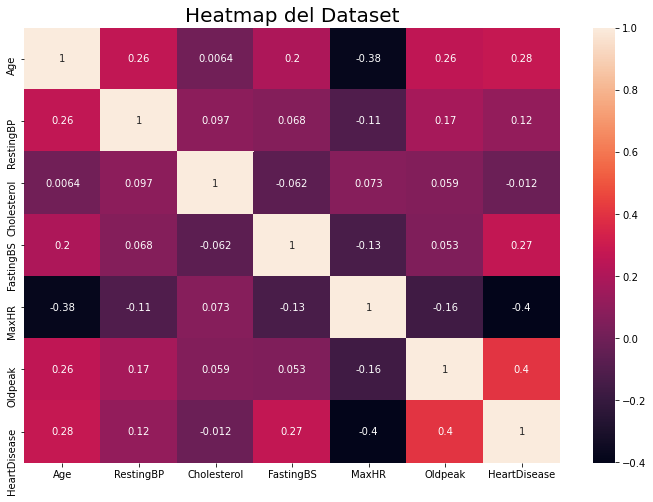

In [14]:
# Realizaremos un mapa de calor entre las variables del dataset utilizando la correlación de peearson
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr('pearson'),annot = True)
plt.title('Heatmap del Dataset', fontsize = 20)
plt.show()

Utilizando la correlación de Pearson que indica la dependencia lineal entre dos variables cuantitativas, podemos realizar analísis sobre que variables influyen mas entre sí y cuales no.

### Pair Plots <a class="anchor" id="section_1_eda_pair_plots"></a>


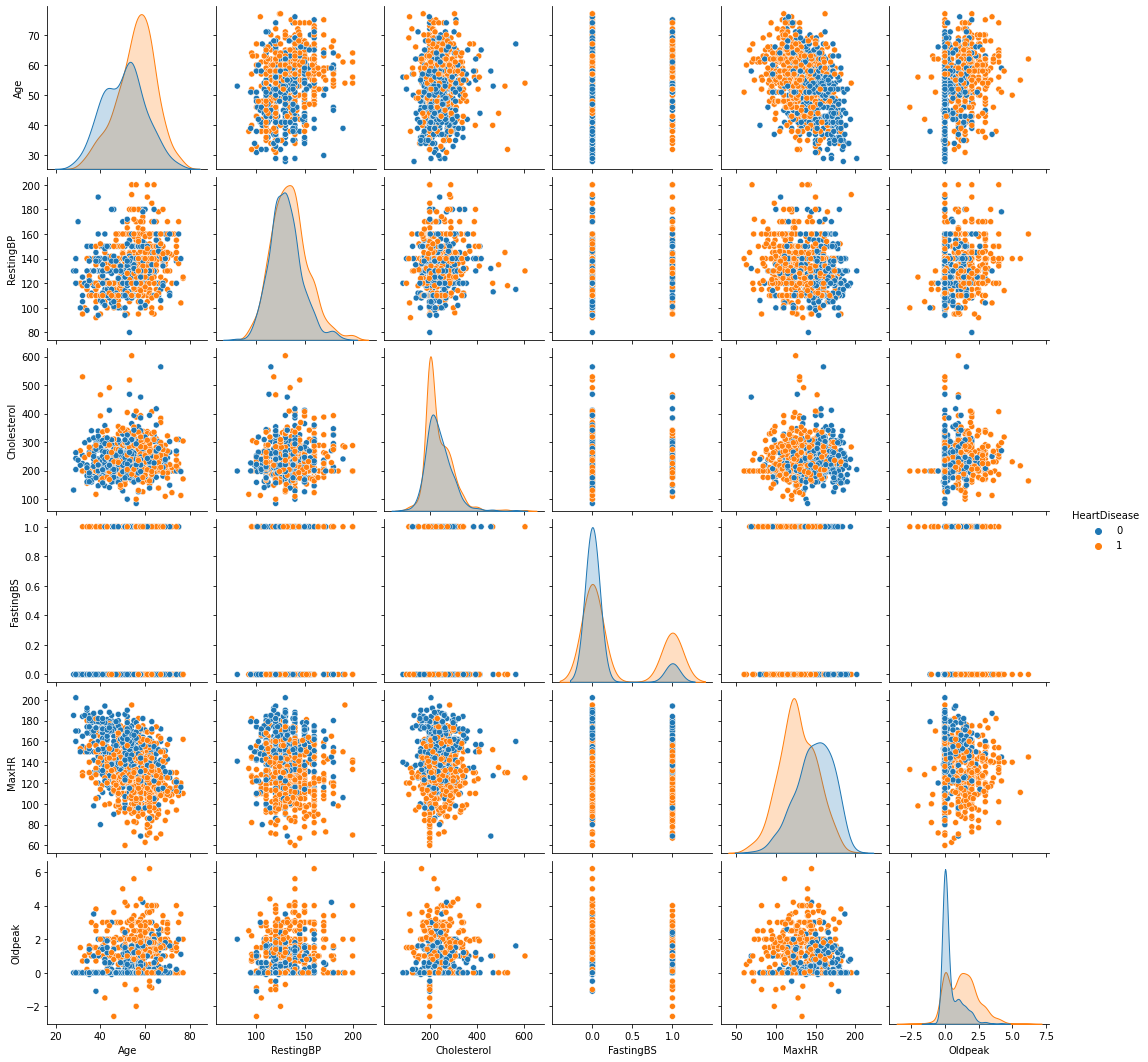

In [15]:
sns.pairplot(df,hue="HeartDisease")

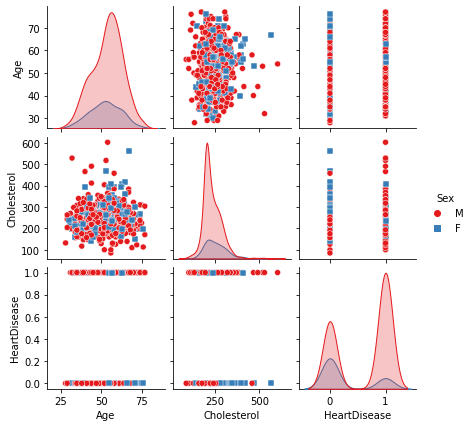

In [16]:
#Pairplot: variables relaciondas con el sexo
sns.pairplot(df, hue = 'Sex', height = 2, palette = 'Set1', markers=['o','s'],
            x_vars=["Age", "Cholesterol", "HeartDisease"],
            y_vars=["Age", "Cholesterol", "HeartDisease"],
            )

## Segunda Entrega <a class="anchor" id="segunda-entrega"></a>


In [17]:
# Convierto las variables categoricas como unicas numericas asi las puedo utilizar para el algoritmo
cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat] = df[cat].apply(lb.fit_transform)

### Preparación de datos <a class="anchor" id="section_2_preparacion_datos"></a>


In [18]:
#En principio se define la variable objetivo (Y), que en este caso corresponde a HeartDisease.
y = df.HeartDisease
X = df.drop(columns = 'HeartDisease')

In [19]:
#Preparación train y test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y) 

### Algoritmo de Clasificación <a class="anchor" id="section_2_algoritmos"></a>

Decidimos probar 3 algoritmos de clasificación de aprendizaje supervisado y observar las métricas que generan, para luego definir cual eligiremos 

### Árboles de Decisión <a class="anchor" id="section_2_algoritmos_arboles"></a>


Primero vamos a buscar cual es el max depth y min samples split que genera el menor error en testing, lo cual nos interesa para no overfittear

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, mean_squared_error

In [21]:
tree = DecisionTreeClassifier(max_depth=5,min_samples_split=30) 

In [22]:
#Entrenamiento del modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=30)

In [23]:
#Predicción del modelo
y_train_pred = tree.predict(X_train) 
y_test_pred = tree.predict(X_test) 

In [24]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Porcentaje de aciertos sobre el set de evaluación:',round(test_accuracy*100,2),'%')

Porcentaje de aciertos sobre el set de evaluación: 80.43 %


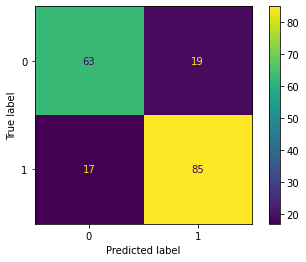

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Ploteamos la Matriz
cm_tree = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()

plt.show()

In [26]:
# Calculo de la precision, ROC, AUC y F1
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print('La precision del set de entrenamiento:', round(train_precision*100,2),'%')
print('La precision del set de evaluación:',round(test_precision*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc*100,2),'%')



La precision del set de entrenamiento: 87.04 %
La precision del set de evaluación: 81.73 %
El ROC y AUC de entrenamiento es de : 87.77 %
El ROC y AUC de evaluación es de: 80.08 %


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        82
           1       0.82      0.83      0.83       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



Text(0.5, 1.0, 'Curva ROC')

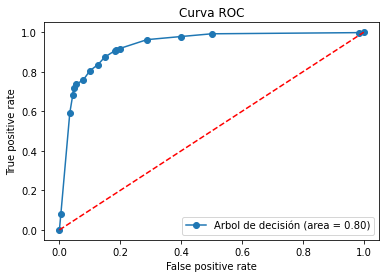

In [28]:
#Graficamos Curva ROC
from sklearn.metrics import roc_curve
y_score = tree.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)
plt.plot(fpr, tpr, '-o',label='Arbol de decisión (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Curva ROC')

Observamos una que la curva ROC nos muestra un comportamiento mas que aceptable para la predicción realizada

**Feature Importance**

In [29]:
#Importancia de cada feature para el árbol
tree_importance = pd.DataFrame({"Feature Importance":tree.feature_importances_}, 
                               index=X_train.columns)
tree_importance

Feature Importance
Age                       0.017395
Sex                       0.025792
ChestPainType             0.131937
RestingBP                 0.002607
Cholesterol               0.009036
FastingBS                 0.006394
RestingECG                0.003947
MaxHR                     0.075914
ExerciseAngina            0.000000
Oldpeak                   0.093594
ST_Slope                  0.633385

**Tree Structure**

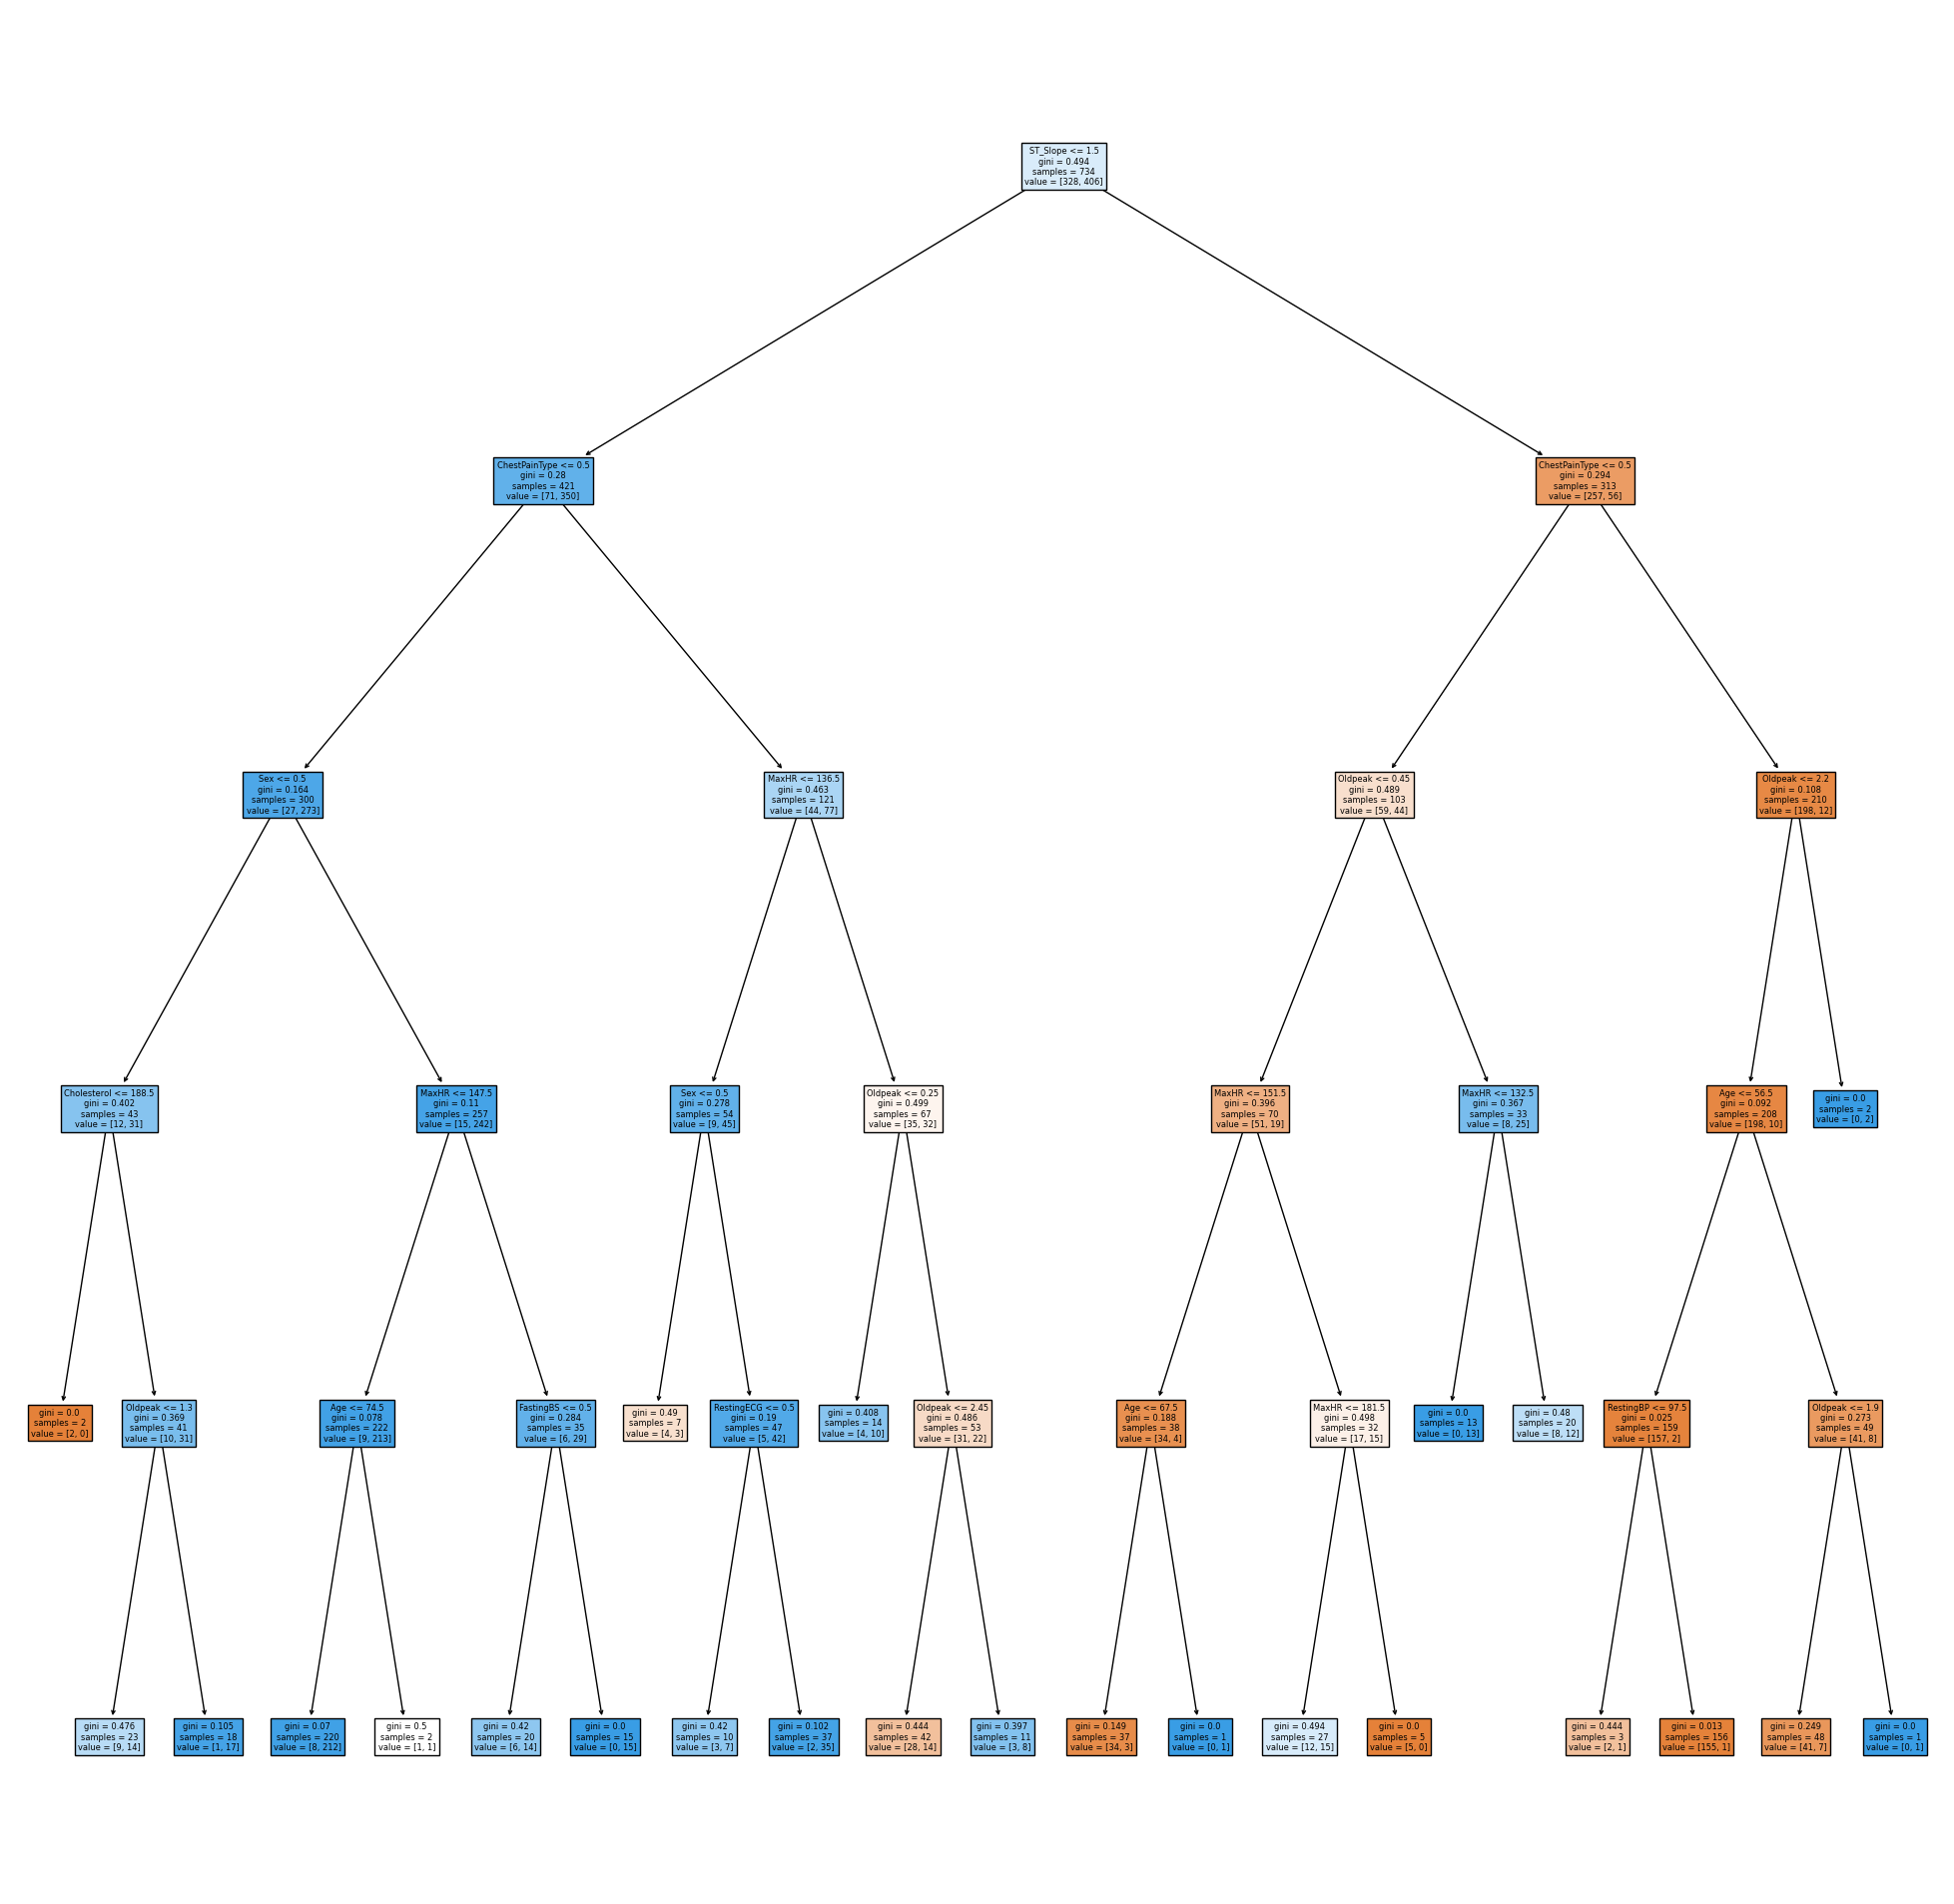

In [30]:
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=100)
plot_tree(decision_tree = tree, feature_names=X_train.columns, filled = True);

### Random Forest <a class="anchor" id="section_2_algoritmos_random"></a>


In [31]:
#Creación del modelo Random Forest.
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
#Predicción del modelo
y_train_pred_rf = model_rf.predict(X_train) 
y_test_pred_rf = model_rf.predict(X_test) 

In [35]:
#Calculo el accuracy en Train y Test
from sklearn.metrics import accuracy_score
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Porcentaje de aciertos sobre el set de entrenamiento:',round(train_accuracy_rf*100,2),'%')
print('Porcentaje de aciertos sobre el set de evaluación:',round(test_accuracy_rf*100,2),'%')


Porcentaje de aciertos sobre el set de evaluación: 100.0 %
Porcentaje de aciertos sobre el set de evaluación: 85.33 %


**Feature Importance**

Text(0.5, 0, 'Feature Importance')

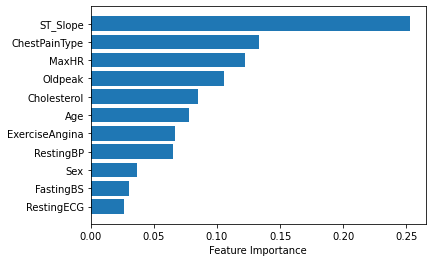

In [34]:
sort = model_rf.feature_importances_.argsort()
plt.barh(X_train.columns[sort], model_rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

En este caso la importancia de las variables es más equitativa que la calculada con el modelo de árboles de decisión. Y todas las variables presentan importancia.

In [61]:
# Calculo de la precision, ROC, AUC y F1

train_precision_rf = precision_score(y_train, y_train_pred_rf)
test_precision_rf= precision_score(y_test, y_test_pred_rf)
train_auc_rf = roc_auc_score(y_train, y_train_pred_rf)
test_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print('La precision del set de entrenamiento:', round(train_precision*100,2),'%')
print('La precision del set de evaluación:',round(test_precision*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc*100,2),'%')

La precision del set de entrenamiento: 87.04 %
La precision del set de evaluación: 81.73 %
El ROC y AUC de entrenamiento es de : 87.77 %
El ROC y AUC de evaluación es de: 80.08 %


In [62]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        82
           1       0.88      0.89      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



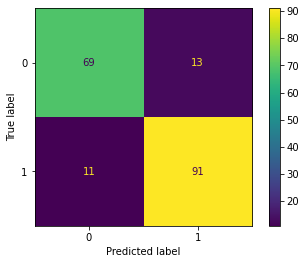

In [63]:
#Ploteamos la Matriz
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()

plt.show()

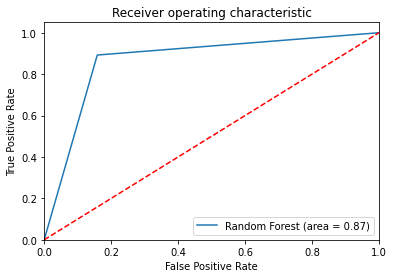

In [64]:
#Graficamos Curva ROC

rf_roc_auc = roc_auc_score(y_test, y_test_pred_rf)
y_score_rf = tree.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

### Regresión Logística <a class="anchor" id="section_2_algoritmos_reg_log"></a>


In [65]:
#Creación regresión logística
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression(max_iter=700,random_state=42)

In [66]:
#Entrenamiento del modelo
model_rl = regresion_logistica.fit(X_train,y_train)
print("Accuracy de entrenamiento:", round(model_rl.score(X_train, y_train)*100,2), '%')

Accuracy de entrenamiento: 84.74 %


In [67]:
#Evaluación del modelo

p_pred = model_rl.predict_proba(X_test)[:,1]
y_test_pred_rl = model_rl.predict(X_test)


In [68]:
#Calculo el accuracy en Test
test_accuracy_rl = accuracy_score(y_test, y_test_pred_rl)

print('Porcentaje de aciertos sobre el set de evaluación:',round(test_accuracy_rl*100,2),'%')

Porcentaje de aciertos sobre el set de evaluación: 85.33 %


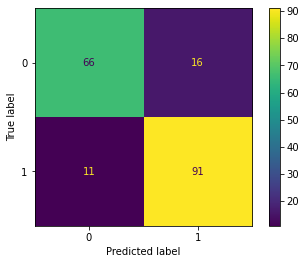

In [69]:
cm_rl = confusion_matrix(y_test, y_test_pred_rl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rl)
disp.plot()

plt.show()

In [70]:
# Calculo de la precision, ROC, AUC y F1

test_precision_rl = precision_score(y_test, y_test_pred_rl)

test_auc_rl = roc_auc_score(y_test, y_test_pred_rl)


print('La precision del set de evaluación:',round(test_precision_rl*100,2),'%')

print('El ROC y AUC de evaluación es de:',round(test_auc_rl*100,2),'%')

La precision del set de evaluación: 85.05 %
El ROC y AUC de evaluación es de: 84.85 %


In [71]:
print(classification_report(y_test, y_test_pred_rl))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        82
           1       0.85      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



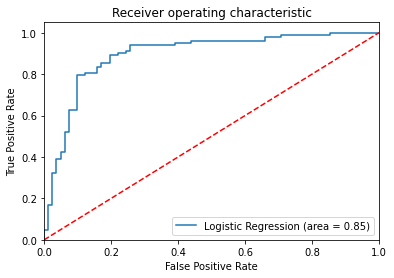

In [72]:
#Graficamos Curva ROC

logit_roc_auc = roc_auc_score(y_test, y_test_pred_rl)
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Observando las métricas utilizadas, podemos concluir que el modelo que mejor se comporto fue el de random forest, obteniendo los mayores porcentajes de exactitud, precisión y AUC

## Tercera Entrega <a class="anchor" id="tercera-entrega"></a>


El objetivo de esta entrega es proponer distintos métodos de optimización del modelo RandomForest. A su vez, se evaluará el impacto de la validación de los datos (comparando un modelo de validación simple, el modelo KFold y el modelo LeaveOneOut). 

### **Validación de datos**<a class="anchor" id="section_3_valid_datos"></a>

**Validación simple de datos**<a class="anchor" id="section_3_valid_datos_simple"></a>

In [101]:
model_rf.fit(X_train, y_train)
score_sv = model_rf.score(X_test, y_test)

**Cross validation: KFold**<a class="anchor" id="section_3_valid_datos_Kfold"></a>

In [102]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
y = df['HeartDisease'].to_numpy() 

for n in df.columns:
  if str(df[n].dtype) == 'object' or str(df[n].dtype) == 'category':
    df[n] = df[n].astype('category').cat.codes
X = df.drop(['HeartDisease'], axis=1).to_numpy()

KFold = KFold(n_splits=5, random_state=0, shuffle=True)

scores_kf = cross_val_score(model_rf, X, y, scoring='accuracy', cv=KFold, n_jobs=-1)

**Cross Validation: Leave One Out**<a class="anchor" id="section_3_valid_datos_leaveoneout"></a>

In [103]:
from sklearn.model_selection import LeaveOneOut
from numpy import absolute
from numpy import mean
from numpy import std

loo = LeaveOneOut()

scores_loo = cross_val_score(model_rf, X, y, scoring='accuracy', cv=loo, n_jobs=-1)

**Comparación validaciones**<a class="anchor" id="section_3_valid_datos_comparacion"></a>

In [104]:
print('Accuracy Simple Validation: %.3f (%.3f)' % (mean(score_sv), std(score_sv)))
print('Accuracy KFold: %.3f (%.3f)' % (mean(scores_kf), std(scores_kf)))
print('Accuracy Loo: %.3f (%.3f)' % (mean(scores_loo), std(scores_loo)))

Accuracy Simple Validation: 0.864 (0.000)
Accuracy KFold: 0.865 (0.018)
Accuracy Loo: 0.861 (0.346)


A priori, podría decirse que el accuracy del modelo de validación simple es el más alto. Sin embargo, se utilizarán los conjuntos de train y test obtenidos por el modelo LOO, con el objeto de obtener mejores resultados en la predicción del modelo en función de datos de entrada obtenidos a partir de una técnica de validación cruzada.

### GridSearch <a class="anchor" id="section_3_grid_search"></a>

In [80]:

# Cantidad de árboles en el random forest
n_estimators = [200,400,600]
# Cantidad de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Máxima cantidad de niveles en cada arbol
max_depth = [5,10]
max_depth.append(None)
# Cantidad mínima de muestras para seprar un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [81]:
from sklearn.model_selection import GridSearchCV
rf_GS = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 3)
rf_GS.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [82]:
rf_GS.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [87]:
model_rf1 = RandomForestClassifier(random_state=42,bootstrap = False, max_depth = 10,
                                   max_features ='sqrt', min_samples_leaf = 4, min_samples_split = 2,
                                   n_estimators = 400, class_weight="balanced")
model_rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400, random_state=42)

In [91]:
y_train_pred_rf1 = model_rf1.predict(X_train)
y_test_pred_rf1 = model_rf1.predict(X_test)

In [92]:
train_precision_rf1 = precision_score(y_train, y_train_pred_rf1)
test_precision_rf1 = precision_score(y_test, y_test_pred_rf1)
train_auc_rf1 = roc_auc_score(y_train, y_train_pred_rf1)
test_auc_rf1 = roc_auc_score(y_test, y_test_pred_rf1)

print('La precision del set de entrenamiento:', round(train_precision_rf1*100,2),'%')
print('La precision del set de evaluación:',round(test_precision_rf1*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc_rf1*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc_rf1*100,2),'%')

La precision del set de entrenamiento: 96.58 %
La precision del set de evaluación: 89.9 %
El ROC y AUC de entrenamiento es de : 96.51 %
El ROC y AUC de evaluación es de: 87.53 %


### RandomSearch <a class="anchor" id="section_3_random_search"></a>

In [93]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [94]:
rf_random = RandomizedSearchCV(estimator=model_rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [95]:
rf_random.best_params_


{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [98]:
model_rf2= RandomForestClassifier(n_estimators=1400,class_weight="balanced", max_features="auto", 
                                  max_depth= 70,min_samples_split = 2,min_samples_leaf = 2,bootstrap= True,)
model_rf2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=70,
                       min_samples_leaf=2, n_estimators=1400)

In [99]:
y_train_pred_rf2 = model_rf2.predict(X_train)
y_test_pred_rf2 = model_rf2.predict(X_test)


In [100]:
train_precision_rf2 = precision_score(y_train, y_train_pred_rf2)
test_precision_rf2 = precision_score(y_test, y_test_pred_rf2)
train_auc_rf2 = roc_auc_score(y_train, y_train_pred_rf2)
test_auc_rf2 = roc_auc_score(y_test, y_test_pred_rf2)

print('La precision del set de entrenamiento:', round(train_precision_rf2*100,2),'%')
print('La precision del set de evaluación:',round(test_precision_rf2*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc_rf2*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc_rf2*100,2),'%')

La precision del set de entrenamiento: 96.6 %
La precision del set de evaluación: 89.32 %
El ROC y AUC de entrenamiento es de : 96.88 %
El ROC y AUC de evaluación es de: 88.39 %
